# import

In [2]:
from Utilities.utils import *
# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
f3_data_dict = load_h5(os.path.join(current_working_dir,r"f3_data.h5"))

yellow = '#8FC681'
green = '#4DA5BF'
blue = '#FFD161'
red = '#36495E'
dark_blue = '#724F94'
purple = '#EE7060'
gold = '#C6963E'
colors = ['---',red,green,yellow,blue,purple,gold,dark_blue]

# figure B

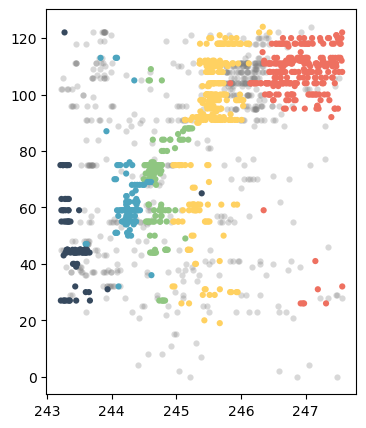

In [3]:

## plotting:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrow, ncol,figsize=(4, 5))
# plot background in grey 
ax.scatter(f3_data_dict['example_awake_data']['background_spike'], f3_data_dict['example_awake_data']['background_neuron_order'],marker = 'o', s=20, linewidth=0,color = 'grey' ,alpha=0.3)
# plot spikes without background
ax.scatter(f3_data_dict['example_awake_data']['ppseq_spikes'], f3_data_dict['example_awake_data']['ppseq_neuron_order'],marker = 'o', s=20, linewidth=0,color = f3_data_dict['example_awake_data']['ppseq_color'],alpha=1)



# figure C

Text(0.5, 1.0, 'held sequences in colour and extra sequences + background in grey')

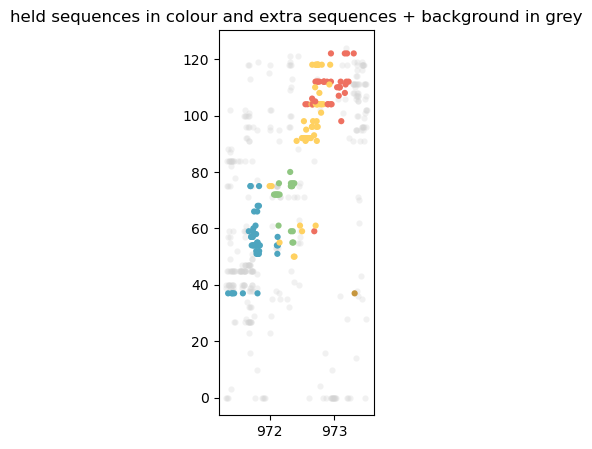

In [4]:
## plotting:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrow, ncol,figsize=(2, 5))
# plot background in grey 
ax.scatter(f3_data_dict['replay_example_dict']['background_spike'], f3_data_dict['replay_example_dict']['background_neuron_order'],marker = 'o', s=20, linewidth=0,color = 'lightgrey' ,alpha=0.3)
# plot spikes without background
ax.scatter(f3_data_dict['replay_example_dict']['ppseq_spikes'], f3_data_dict['replay_example_dict']['ppseq_neuron_order'],marker = 'o', s=20, linewidth=0,color = f3_data_dict['replay_example_dict']['ppseq_color'],alpha=1)
ax.set_title('held sequences in colour and extra sequences + background in grey')


# figure D

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_11588\1924694205.py:27: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_devs.append(scipy.stats.sem(neuron_spike_positions[neuron]))


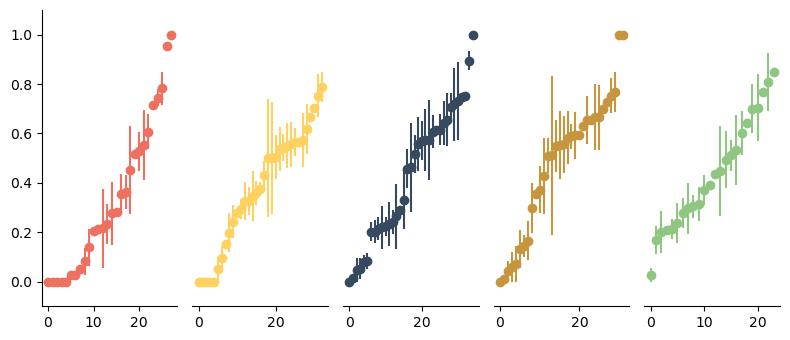

In [5]:
replay_motif_data = f3_data_dict['replay_motif_data'].copy()

replay_motif_data.cluster_seq_type = [ast.literal_eval(item) for item in replay_motif_data.cluster_seq_type.values]

# filter for sequentially forward replay
sequential_replay_motif_data = replay_motif_data[replay_motif_data.catagory == 'forward']
sequential_replay_motif_data = sequential_replay_motif_data.reset_index(drop = True)

forward_neuron_spike_positions_all_seqs = []
for i in range(1,7):
    forward_neuron_spike_positions_all_seqs += [determine_neuron_spike_pos(sequential_replay_motif_data,i)]

fig, axs = plt.subplots(1,5, figsize=(8,3.5))
ordering = [4,3,0,5,2]

for i, ax in enumerate(axs):
    idx = ordering[i]
    neuron_spike_positions = forward_neuron_spike_positions_all_seqs[idx]

    if len(neuron_spike_positions) > 1:
        means = []
        std_devs = []
        neurs = []
        for neuron in neuron_spike_positions:
            neurs.append(neuron)
            means.append(np.mean(neuron_spike_positions[neuron]))
            std_devs.append(scipy.stats.sem(neuron_spike_positions[neuron]))

        # sort
        sorted_data = sorted(zip(means, std_devs))
        sorted_means, sorted_std_devs = zip(*sorted_data)

        ax.errorbar(range(len(means)), sorted_means, yerr=sorted_std_devs,
                    fmt='o', capsize=0, color=colors[idx+1])

    ax.set_ylim(-0.1, 1.1)

    # ---- REMOVE TOP + RIGHT SPINES ----
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # ---- REMOVE ALL Y–TICKS EXCEPT LEFTMOST ----
    if i != 0:
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)   # remove left line
    else:
        ax.spines['left'].set_visible(True)    # keep left axis on first subplot
        ax.yaxis.set_tick_params(width=0.8)


fig.tight_layout()


# figure E

--- x-axis ---
 Shapiro–Wilk:    W=0.962, p=0.000 -> non-normal
 D’Agostino K²: K²=950.775, p=0.000 -> non-normal

--- y-axis ---
 Shapiro–Wilk:    W=0.963, p=0.000 -> non-normal
 D’Agostino K²: K²=2709.202, p=0.000 -> non-normal

------------------ regression ------------------------------------------
r = 0.633822824300782
r^2 = 0.4017313726046199
p-value = 0.0


c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\figure3\Utilities\utils.py:508: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('bin')['x'].mean()
c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\figure3\Utilities\utils.py:509: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_std = df.groupby('bin')['x'].std()
c:\miniconda\envs\proc_replay_2025\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6727.
  res = hypotest_fun_out(*samples, **kwds)


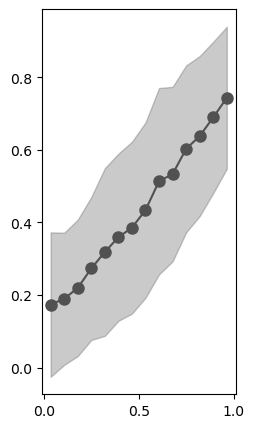

In [6]:
fig, ax = plt.subplots(1, 1,figsize=(2.5, 5))

x = f3_data_dict['replay_dict']['neuron_rel_forward_replay_positions']
y = f3_data_dict['replay_dict']['neuron_rel_awake_positions_forwards']
a,b = plot_sleep_awake_spike_position(ax,x,y, '#515151')
test_univariate_normality(x, y, alpha=0.05)

print('------------------ regression ------------------------------------------')
import statsmodels.api as sm
group1_data = {'x': x, 'y': y}
df1 = pd.DataFrame(group1_data)
# Add a constant term to the independent variable
data = sm.add_constant(df1)

# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()

r = np.sign(model.params['x']) * np.sqrt(model.rsquared)

print(f"r = {r}")
print(f"r^2 = {model.rsquared}")
print(f"p-value = {model.pvalues['x']}")


# figure F

Text(0.5, 1.0, 'held sequences in colour and extra sequences + background in grey')

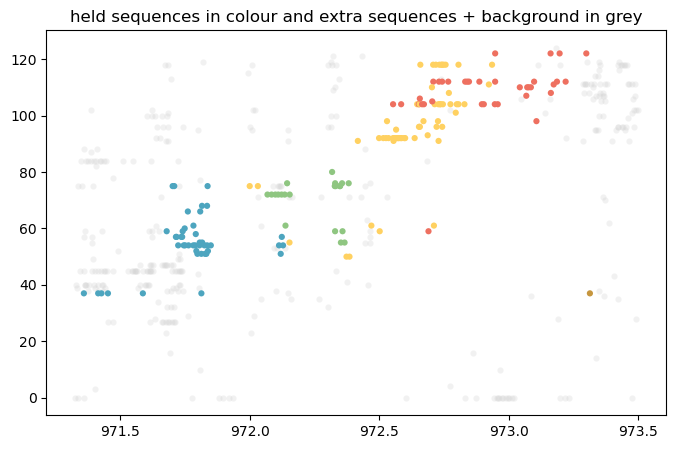

In [7]:
## plotting:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrow, ncol,figsize=(8, 5))
# plot background in grey 
ax.scatter(f3_data_dict['multiple_replays_example_dict']['background_spike'], f3_data_dict['multiple_replays_example_dict']['background_neuron_order'],marker = 'o', s=20, linewidth=0,color = 'lightgrey' ,alpha=0.3)
# plot spikes without background
ax.scatter(f3_data_dict['multiple_replays_example_dict']['ppseq_spikes'], f3_data_dict['multiple_replays_example_dict']['ppseq_neuron_order'],marker = 'o', s=20, linewidth=0,color = f3_data_dict['multiple_replays_example_dict']['ppseq_color'],alpha=1)
ax.set_title('held sequences in colour and extra sequences + background in grey')

# figure G

6
5
4
3
2
Using a rate of 0.083287 events per 0.3 seconds.
Probability of events co-occurring within 0.3 + mean event length:
1 events co-occurring: Probability 0.076631, Percentage 95.89%
2 events co-occurring: Probability 0.003191, Percentage 3.99%
3 events co-occurring: Probability 0.000089, Percentage 0.11%
4 events co-occurring: Probability 0.000002, Percentage 0.00%
5 events co-occurring: Probability 0.000000, Percentage 0.00%
6 events co-occurring: Probability 0.000000, Percentage 0.00%
-------
6
Test statistic: -597.3330284954108
P-value: 3.0476785486188104e-34
cohens d
{'cohens_d': np.float64(-149.3332571238527)}
-------
5
Test statistic: -13.566396917853998
P-value: 0.0008662572745404527
cohens d
{'cohens_d': np.float64(-6.783198458926999)}
-------
4
Test statistic: 3.3503322560610753
P-value: 0.004760817201757291
cohens d
{'cohens_d': np.float64(0.8650520687990711)}
-------
1
Test statistic: 37.26760634476721
P-value: 5.893813139436327e-20
cohens d
{'cohens_d': np.float64(8.

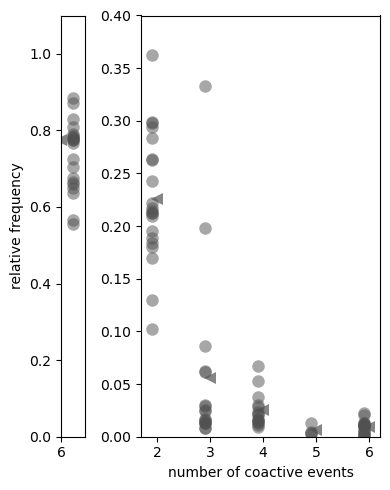

In [8]:
# extract data into collaped var 
collapsed = defaultdict(list)
for k, v in convert_word_keys_to_numeric(f3_data_dict['replay_dict']['expert_coactive_freqs']).items():
    k_int = int(k)
    if k_int >= 6:
        collapsed['6'].extend(v)
    else:
        collapsed[str(k_int)].extend(v)
e_coactive_freqs_counts = collapsed

# plot 
fig, [ax,ax2]= plt.subplots(1, 2,figsize=(4, 5),gridspec_kw={'width_ratios': [1, 10]})
means = []
stds = []
x_ = []
for item in e_coactive_freqs_counts:
    ax.plot(np.ones(len(e_coactive_freqs_counts['1']))*(1),e_coactive_freqs_counts['1'],'o', c = '#515151', alpha = 0.5, markeredgewidth = 0, markersize = 9)
    x_ += [item]
    means += [np.median(e_coactive_freqs_counts['1'])]
    stds += [np.std(e_coactive_freqs_counts['1'])]
    break
means = np.array(means)[np.argsort(x_)]
stds = np.array(stds)[np.argsort(x_)]
x_ = np.array(x_)[np.argsort(x_)]
ax.plot(x_[0],means[0],'<', color = '#515151',alpha = 0.7, markeredgewidth = 0, markersize = 9)
ax.set_xlim(0,2)
upper = means + stds
lower = means - stds
ax.fill_between(x_,(lower),(upper),
    alpha=0.2, edgecolor='None', facecolor='#515151',
    linewidth=1, linestyle='dashdot', antialiased=True)
ax2.set_xlabel('number of coactive events')
ax.set_ylabel('relative frequency')
ax.set_ylim(0,1.1)
means = []
stds = []
x_ = []
for item in e_coactive_freqs_counts:
    if not item == '1':
        print(item)
        ax2.plot(np.ones(len(e_coactive_freqs_counts[item]))*(float(item)-0.1),e_coactive_freqs_counts[item],'o', c = '#515151', alpha = 0.5, markeredgewidth = 0, markersize = 9)
        x_ += [float(item)]
        means += [np.mean(e_coactive_freqs_counts[item])]
        stds += [np.std(e_coactive_freqs_counts[item])]
means = np.array(means)[np.argsort(x_)]
stds = np.array(stds)[np.argsort(x_)]
x_ = np.array(x_)[np.argsort(x_)]
ax2.plot(x_,means,'<', color = '#515151',alpha = 0.7, markeredgewidth = 0, markersize = 8)
ax2.set_ylim(0,0.4)
plt.tight_layout()

######### stats
# Input parameters
rate_per_second = np.mean(f3_data_dict['replay_dict']['reactivations_per_min'])/60
event_length_s = np.nanmean(f3_data_dict['replay_dict']['event_lens'])
# Calculate probabilities and percentages
rate_per_0p3_seconds, results, percentages = calculate_probabilities(rate_per_second, event_length_s)
# Display results
print(f"Using a rate of {rate_per_0p3_seconds:.6f} events per 0.3 seconds.")
print("Probability of events co-occurring within 0.3 + mean event length:")
for k, probability in results.items():
    print(f"{k} events co-occurring: Probability {probability:.6f}, Percentage {percentages[k]:.2f}%")
# test each one for significance from expected
expect_percentages= [0.95,0.04,0.011,0,0,0]
for i,key in enumerate(e_coactive_freqs_counts):
    data = np.array(e_coactive_freqs_counts[key])
    print('-------')
    print(key)
    ### all normal so use t test 
    # Hypothesized value (e.g., population mean or constant)
    hypothesized_value = expect_percentages[i]
    # Perform one-sample t-test
    statistic, p_value = ttest_1samp(data, hypothesized_value)
    # Print the test statistic and p-value
    print("Test statistic:", statistic)
    print("P-value:", p_value)
    print('cohens d')
    print(effect_size(x=data, test='one_sample_ttest',popmean=hypothesized_value))


# figure H

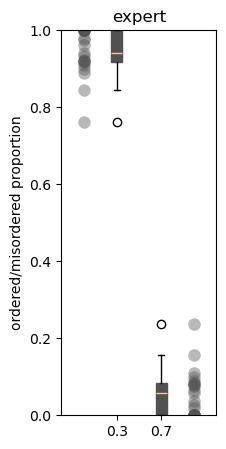

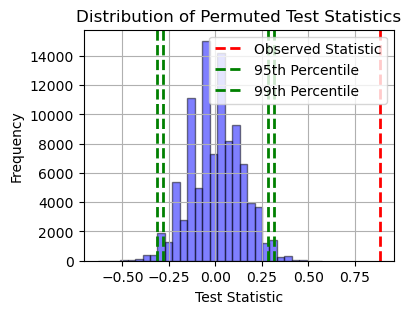

- p-value: 0.0
- 99th percentile of permuted statistics: 0.31503195284349045
- Observed Test Statistic: 0.8835621876858357
cohens d = 14.344563129258281


In [9]:

plot_ordered_misrodered(f3_data_dict['replay_dict']['ordered_misordered'],'expert','ordered/misordered proportion', '#515151')

    
list1 = [float(item[0]) for item in f3_data_dict['replay_dict']['ordered_misordered']] 
list2 = [float(item[1]) for item in f3_data_dict['replay_dict']['ordered_misordered']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')


# figure J

{'whiskers': [<matplotlib.lines.Line2D at 0x21fcdb56230>,
 'caps': [<matplotlib.lines.Line2D at 0x21fcdb56830>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21fcdb55de0>],
 'medians': [<matplotlib.lines.Line2D at 0x21fcdb56e30>],
 'fliers': [<matplotlib.lines.Line2D at 0x21fcdb57130>],
 'means': []}

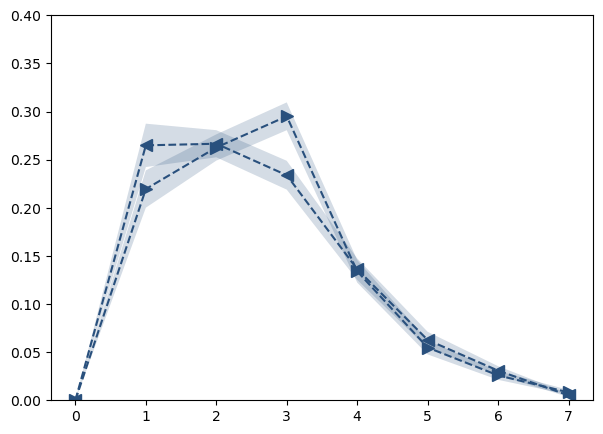

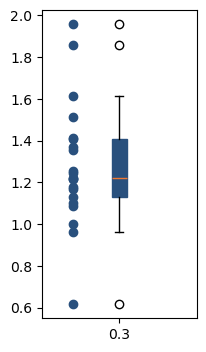

In [10]:
# plot distribution of warps
f_warp_factors, r_warp_factors, forward_total, reverse_total = extract_mean_warps(pd.DataFrame(f3_data_dict['replay_dict']['regression']), [0.1, 0.2, 1,2, 5, 10,20,40])
color_ = "#29507D"
fig,ax = plt.subplots(1, 1,figsize=(7, 5))
plot_warp_factors(ax, f_warp_factors, r_warp_factors, bins_, color_)


fig, ax = plt.subplots(figsize=(2, 4))
proportion_forward_v_reverse = np.array(forward_total)/np.array(reverse_total)
ax.plot(np.zeros(len(proportion_forward_v_reverse)),proportion_forward_v_reverse,'o', color = "#29507D")
ax.boxplot([x for x in proportion_forward_v_reverse if not np.isnan(x)], positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#29507D', color='#29507D'), medianprops=dict(color='#EE7832'))


# figure K

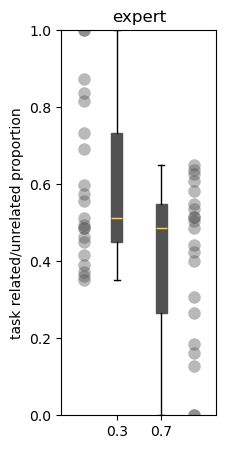

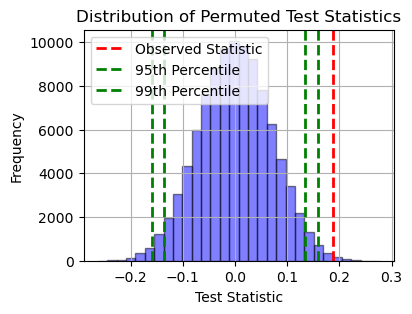

- p-value: 0.00252
- 99th percentile of permuted statistics: 0.15828914697535956
- Observed Test Statistic: 0.1878173237864238
cohens d = 0.9066336142773078


In [11]:
plot_ordered_misrodered(f3_data_dict['replay_dict']['task_nontask'],'expert','task related/unrelated proportion','#515151')

list1 = [float(item[0]) for item in f3_data_dict['replay_dict']['task_nontask']] 
list2 = [float(item[1]) for item in f3_data_dict['replay_dict']['task_nontask']] 
list1= [x for x in list1 if not np.isnan(x)] 
list2= [x for x in list2 if not np.isnan(x)] 
permutation_test(list1, list2)
print(f'cohens d = {cohens_d(list1, list2)}')


# figure L

(0.0, 0.45)

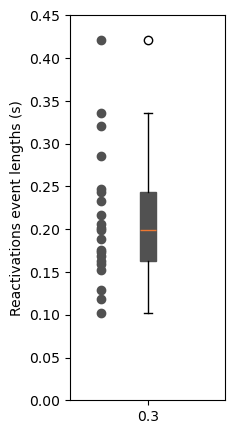

In [12]:
expert_event_lens = f3_data_dict['replay_dict']['event_lens']

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.zeros(len(expert_event_lens)), expert_event_lens, 'o', color = '#515151')
ax.boxplot(expert_event_lens, positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#515151', color='#515151'), medianprops=dict(color='#EE7832'))

ax.set_ylabel('Reactivations event lengths (s)')

ax.set_ylim(0,0.45)

# figure M

Fitted parameters: a = 0.03267556939789752, b = 3.21309210901926
R-squared: 0.9926259080124209
p-values: [np.float64(1.7030314393595702e-05), np.float64(1.1325253623795106e-08)]


Text(0.5, 1.0, 'late')

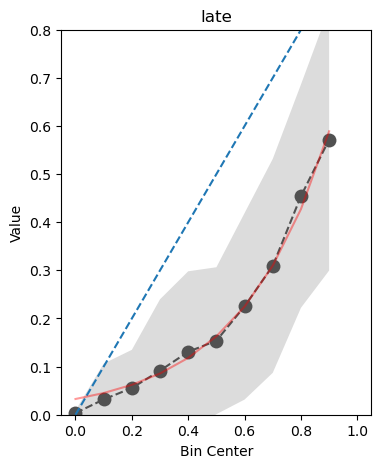

In [13]:
fig, ax = plt.subplots(1, 1,figsize=(4, 5))
late_awake_sleep_relationship = return_binned_neuron_awake_sleep_rel(f3_data_dict['replay_dict']['awake_seqbyseq_neuron_involvements'],f3_data_dict['replay_dict']['sleep_seqbyseq_neuron_involvements'])
plot_awake_sleep_relationship(late_awake_sleep_relationship,'#515151',ax)
ax.set_title('late')

# figure N

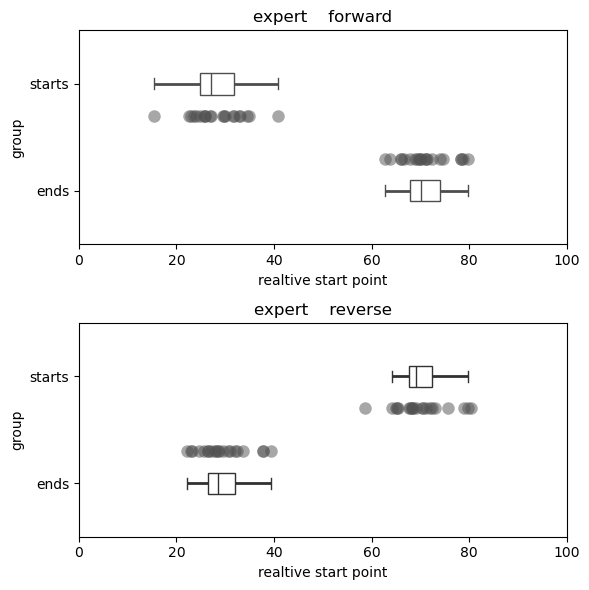

In [14]:
fig,[ax,ax2] = plt.subplots(2, 1,figsize=(6, 6)) 
all_chunk_reverse_start_mean, all_chunk_forward_start_mean, all_chunk_reverse_end_mean, all_chunk_forward_end_mean = extract_start_end_points(pd.DataFrame(f3_data_dict['replay_dict']['start_end']))
plot_start_end_times(all_chunk_reverse_start_mean,all_chunk_forward_start_mean,all_chunk_reverse_end_mean,all_chunk_forward_end_mean,ax,ax2,'expert','#515151')

# figure O

model p value (f statistic) = 
3.1712640703044366e-09
r2 = 
0.6071427149335138
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     5.820
Date:                Sat, 10 Jan 2026   Prob (F-statistic):             0.0190
Time:                        21:46:58   Log-Likelihood:                -227.53
No. Observations:                  61   AIC:                             459.1
Df Residuals:                      59   BIC:                             463.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

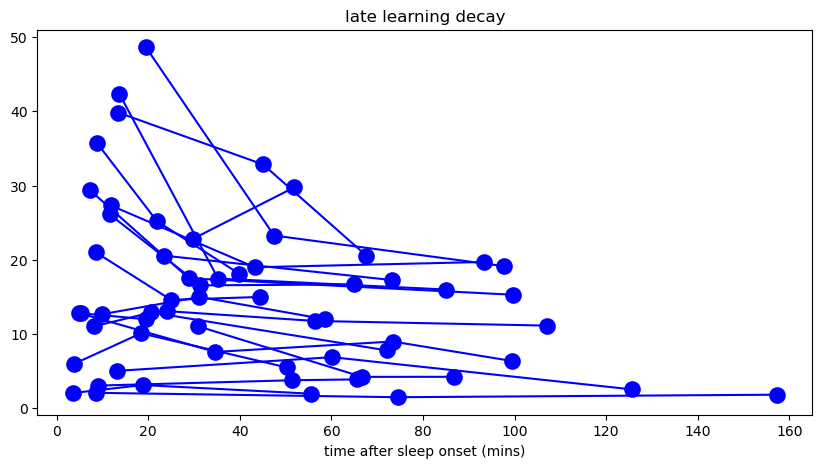

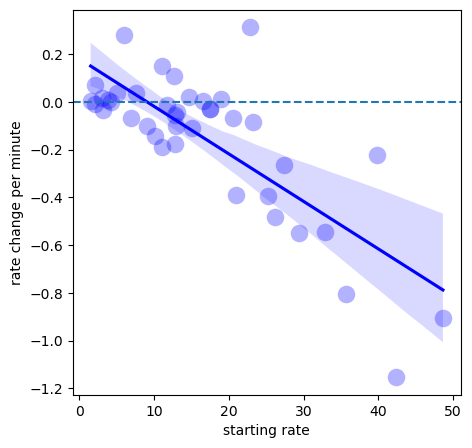

In [16]:

fig,ax = plt.subplots(1, 1,figsize=(10, 5))
AA_rate = []
AA_post_so_time = []
times = []
rates = []
for i,item in enumerate(f3_data_dict['replay_dict']['binned_rate']):
    across_chunks_x = []
    across_chunks_y = []
    for e,chunk_item in enumerate(item):
        #mean for each time series across chunks
        across_chunks_x += [np.mean(f3_data_dict['replay_dict']['bins_relative_so'][i][e])]
        across_chunks_y += [np.mean(chunk_item)]
    AA_rate+=[across_chunks_y]
    AA_post_so_time+=[across_chunks_x]
    ax.plot(across_chunks_x,across_chunks_y, '-o',c = 'blue', alpha = 1, markersize = 12, markeredgewidth = 0)
    # save out stuff for plot 2
    rate_change_per_min = np.diff(across_chunks_y)/np.diff(across_chunks_x)
    times += across_chunks_y[0:-1]
    rates += list(rate_change_per_min)
    

ax.set_title('late learning decay')
ax.set_xlabel('time after sleep onset (mins)')

fig,ax = plt.subplots(1, 1,figsize=(5, 5))                
sns.regplot(x=times, y=rates, ax = ax, color = 'blue',scatter_kws={'s': 160, 'alpha': 0.3,'linewidths': 0})
ax.set_xlabel('starting rate')
ax.set_ylabel('rate change per minute')
ax.axhline(0,0,ls ='--')

group1_data = {'x': times, 'y': rates}
# SaveFig(title_+'decay_regression.pdf',r'C:\Users\Emmett Thompson\Documents\plots\\')
df1 = pd.DataFrame(group1_data)

# Fit linear regression for Group 1
model_group1 = sm.OLS.from_formula('y ~ x', data=df1).fit()

# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group1.f_pvalue)
print('r2 = ')
print(model_group1.rsquared)


# STATS

# flatten list
x = [item for sublist in AA_post_so_time for item in sublist]
y = [item for sublist in AA_rate for item in sublist]

data_for_stats = {'x': x, 'y': y}
df_stats = pd.DataFrame(data_for_stats)

# Add a constant term to the independent variable
data = sm.add_constant(df_stats)
# data = sm.add_constant(df2)
# Fit the regression model
model = sm.OLS(data['y'], data[['const', 'x']],missing='drop').fit()
# Print the summary statistics
print(model.summary())
r = np.sign(model.params['x']) * np.sqrt(model.rsquared)

print(f'r = {r}')
print(model.rsquared)
print(model.pvalues['x'])
